## Review of E&M

Electric and magnetic fields in a vacuum are governed by Maxwell's equations (here in SI units):
$$\nabla \cdot \mathbf{E}= \rho/\epsilon_0 \\ \nabla \cdot \mathbf{B}= 0 \\ 
\nabla \times \mathbf{E}= -\frac{\partial \mathbf{B}}{\partial t} \\
\nabla \times \mathbf{B}= \mu_0\left(\mathbf{J}+\epsilon_0\frac{\partial \mathbf{E}}{\partial t}\right) $$

Unlike in Gaussian units (cgs), Maxwell's equations here depend on the permittivity $\epsilon$ and permeability $\mu$. Since these are dependent on the medium the EM wave propagates through, Maaxwell's equations must be modified in matter by replacing $\epsilon_0$ and $\mu_0$ with the $\epsilon$ and $\mu$ of that material. In general they may be spatially dependent so we should really write $\nabla \cdot (\epsilon\mathbf{E})=\rho$ but we will only be concerned with homogenous materials here.

In matter, it is often useful to define auxillary fields $\mathbf{H} \equiv \mathbf{B}/\mu$ and $\mathbf{D} \equiv \epsilon \mathbf{E}$. In general, these are more complicated relations and are necessary to work with EM waves in matter, but in our case (linear, homogenous matter) the main benefit is simplified notation. In fact, we will replace $\mathbf{B}$ with $\mathbf{H}$ but keep $\mathbf{E}$ for the sake of simple notation only. Maxwell's equations become:

$$\nabla \cdot \mathbf{E}= \rho/\epsilon \\ \nabla \cdot \mathbf{H}= 0 \\ 
\nabla \times \mathbf{E}= -\mu\frac{\partial \mathbf{H}}{\partial t} \\
\nabla \times \mathbf{H}= \mathbf{J}+\epsilon\frac{\partial \mathbf{E}}{\partial t} $$

Here, we will only be concerned with the 1D-problem. If the $\mathbf{E}$-field only has a z-component and the $\mathbf{H}$-field only has a y-component, we can write the two equations governing the time-evolution of the fields as:
$$\frac{\partial E_z}{\partial x}=\mu \frac{\partial H_y}{\partial t} \\
\epsilon \frac{\partial E_z}{\partial t}=\frac{\partial H_y}{\partial x}$$

Let's visualize how the fields change with time and space. Turn on a harmonic source (a sine wave) at a specific location with a given frequency and watch the film play out!

In [1]:
# import fdtd simulation
from antsim import fdtd

# make the notebook interactive
%matplotlib notebook

<IPython.core.display.Javascript object>


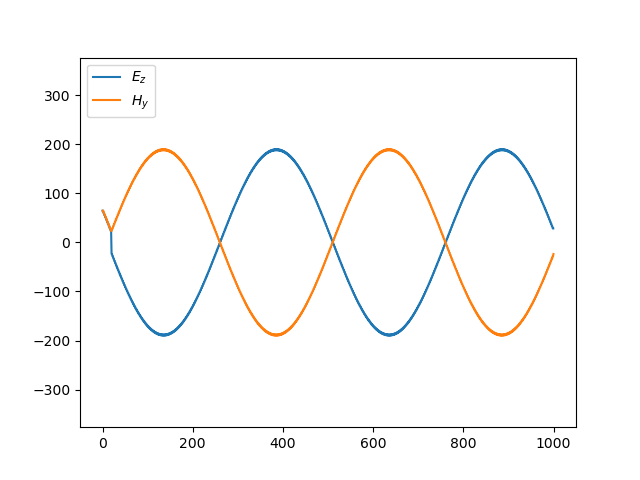

100%|███████████████████████████████████████| 2000/2000 [00:26<00:00, 76.77it/s]


In [3]:
# properties of the simulation
grid_size=1000  # the grid is the space in which the simulation happens
simulation_time=2000  # the number of time units to run the simulation for

# properties of the source field
source_point=10  # where in the grid to inject the source
ppw=500  # points per wavelength, this is inversley proportional to the frequency of the wave

# plotting parameters
plot_interval=20  # if this is equla to n, then we plot the fields at every n'th time step

sim=fdtd.simulator(grid_size)
sim.run(simulation_time, source_point, 'harmonic', plot_interval, ppw=ppw)

We can also use a source that contains a range of frequencies. Let's try a Ricker wavelet:

<IPython.core.display.Javascript object>


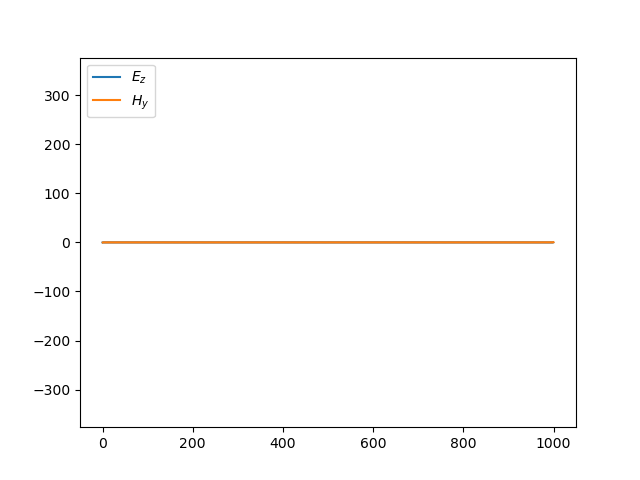

100%|███████████████████████████████████████| 2000/2000 [00:25<00:00, 77.28it/s]


In [4]:
# properties of the simulation
grid_size=1000  # the grid is the space in which the simulation happens
simulation_time=2000  # the number of time units to run the simulation for

# properties of the source field
source_point=10  # where in the grid to inject the source
ppw=500  # points per wavelength at the peak frequency, this is inversley proportional to the frequency of the wave
delay_multiple=1 # controls the spatial delay of the wavelet

# plotting parameters
plot_interval=20  # if this is equla to n, then we plot the fields at every n'th time step

sim=fdtd.simulator(grid_size)
sim.run(simulation_time, source_point, 'ricker', plot_interval, ppw=ppw, delay_multiple=delay_multiple)

## Lossless materials

The simulations abvove were effectively done in a vacuum and are probably not very interesting. The EM wave will simply continue unchanged forever in space and time. However, when the wave gos from one medium to another, the changing Maxwell equations can make a big difference. We show that here by adding changing $\epsilon_r \equiv \epsilon/\epsilon_0$ from its vacuum value of 1 to 4.

<IPython.core.display.Javascript object>


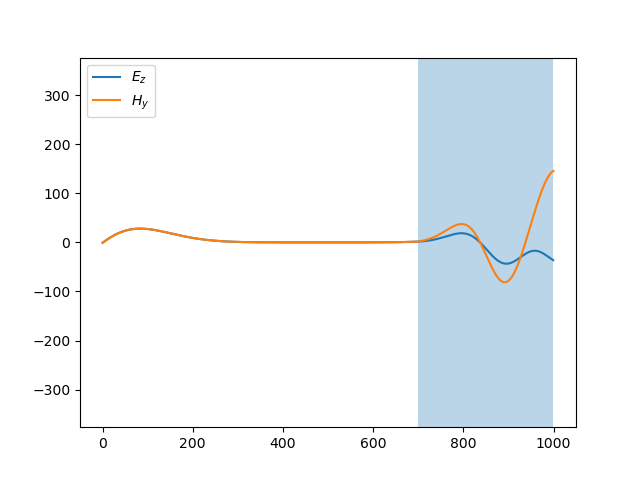

100%|███████████████████████████████████████| 2000/2000 [00:25<00:00, 77.30it/s]


In [5]:
# properties of the simulation
grid_size=1000  # the grid is the space in which the simulation happens
simulation_time=2000  # the number of time units to run the simulation for

# properties of the source field
source_point=10  # where in the grid to inject the source
ppw=500  # points per wavelength at the peak frequency, this is inversley proportional to the frequency of the wave
delay_multiple=1 # controls the spatial delay of the wavelet

# plotting parameters
plot_interval=20  # if this is equal to n, then we plot the fields at every n'th time step

# add a lossless material
epsr=4  # relative permittivity (epsilon_r)
thickness_ratio=.3  # ratio of the total grid that should be filled with the material

sim=fdtd.simulator(grid_size)
sim.add_loss(loss=0, thickness_ratio=thickness_ratio, epsr=epsr)
sim.run(simulation_time, source_point, 'ricker', plot_interval, ppw=ppw, delay_multiple=delay_multiple)

What happened? On the left hand side (the vacuum), Maxwell's equations must be satisfied with $\epsilon_r=1$ and on the right hand side (the dielectric material), they must be satisfied with $\epsilon_r=4$ (or whatever value you changed it to). In isolation this does not make any difference but since the two domains are connected, the fields must satisfy the boundary condition that they are continuous on the interface. In the dielectric material the wave is slower than in vacuum by a factor $n$, the index of refraction. Thus, part of incident wave is forced to be reflected back through the atmosphere. How can we calculate the index of refraction? The speed of an EM wave is given as
$$v=\frac{1}{\sqrt{\mu\epsilon}}=\frac{1}{\sqrt{\mu_0\mu_r\epsilon_0\epsilon_r}}=c\frac{1}{\sqrt{\mu_r\epsilon_r}}, $$
thus, 
$$n=\sqrt{\mu_r\epsilon_r}.$$

Here we model a material with $\mu_r=1$ and $\epsilon_r=4$ so the speed of light should decrease by a factor of 2. This amount to 8/9 of the power of the wave being transmitted and 1/9 of the power being reflected. The curious reader should look up the Fresnel equations for an explanation of how these values were calculated.

## Dispersive materials

In nature, most materials are lossy. In the above simulation, a certain fraction was reflected off the boundary and the rest was transmitted. Within a lossy material, the transmitted wave will be attenuated.

Let $\sigma$ be the conductivity of the material. In the lossless case, we had $\sigma=0$, here we will use a non-zero value. This appears in Maxwell's equations through the relation $\mathbf{J}=\sigma\mathbf{E}$. With a non-zero current density we see from Ampère's law (the fourth of Maxwell's equations) that some of spatial variation of the magnetic field goes into the $\mathbf{J}$-term and the rest goes into evolving the electric field with time. Since it no longer is only changing the electric field, the electric field is attenuated.

For a plane wave solution to Maxwell's equations we get:
$$E_z = E\exp{i(kx-\omega t)}, H_y = H\exp{i(kx-\omega t)} \\
ikE\exp{i(kx-\omega t)}=-\mu i\omega H\exp{i(kx-\omega t)}\\
(\sigma-\epsilon i\omega)E\exp{i(kx-\omega t)}=ikH\exp{i(kx-\omega t)}$$

Thus,
$$kE=-\mu \omega H \\
(\sigma-\epsilon i\omega)E = ikH$$

Solving the first equation for E/H and substituting into the second:

$$E/H=-\frac{\mu\omega}{k} \\
\sigma-\epsilon i\omega = \frac{ik}{E/H}=-\frac{ik^2}{\mu\omega} \\
\implies 1 +i \frac{\sigma}{\epsilon \omega} = \frac{k^2}{\mu\epsilon\omega^2}=\left(\frac{ck}{\omega}\right)^2\frac{1}{\mu_r\epsilon_r}\equiv (\eta/n)^2 $$

The n in the denominator is the same as before: the refractive index of a lossless material. $\eta$ is the complex refractive index given by $\eta=ck/\omega$. 

Multiplying out n, gives:
$$\eta^2=n^2+i\frac{n^2\sigma}{\epsilon\omega}=n^2 + i \frac{\mu\sigma}{\omega}$$

For lossless materials, $\sigma=0$ and we simply get $\eta=n$.

For lossy materials, $\sigma$ attenuates the wave as we argued heuristcally above. Writing the plane wave of the electric field and substituting in the refractive index:

$$E_z = E\exp{i(kx-\omega t)} = E\exp{i\omega(\eta x/c-t)}=E\exp{i\omega((n^2+i\mu\sigma/\omega) x/c-t)}$$

$$E_z=E \exp{(-\mu \sigma x/c)} \cdot \exp{i\omega(n^2x/c-t)}$$

<IPython.core.display.Javascript object>


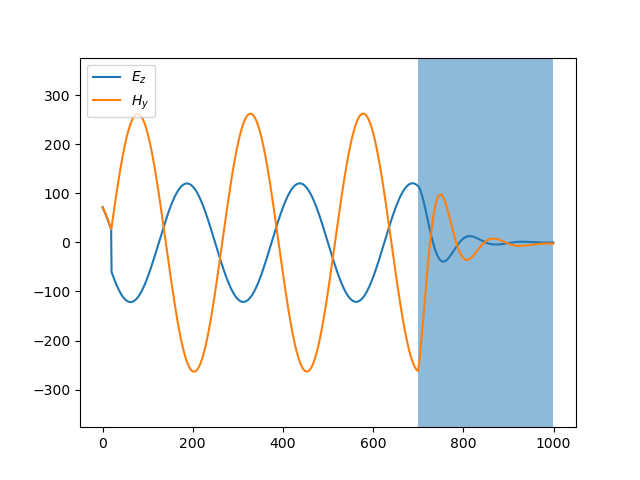

100%|███████████████████████████████████████| 2000/2000 [00:25<00:00, 77.00it/s]


In [5]:
# properties of the simulation
grid_size=1000  # the grid is the space in which the simulation happens
simulation_time=2000  # the number of time units to run the simulation for

# properties of the source field
source_point=10  # where in the grid to inject the source
ppw=250  # points per wavelength at the peak frequency, this is inversley proportional to the frequency of the wave

# plotting parameters
plot_interval=20  # if this is equal to n, then we plot the fields at every n'th time step

# add a lossless material
epsr=4  # relative permittivity (epsilon_r)
thickness_ratio=.3  # ratio of the total grid that should be filled with the material

sim=fdtd.simulator(grid_size)
sim.add_loss(loss=0.01, thickness_ratio=thickness_ratio, epsr=epsr)
sim.run(simulation_time, source_point, 'harmonic', plot_interval, ppw=ppw)

<IPython.core.display.Javascript object>


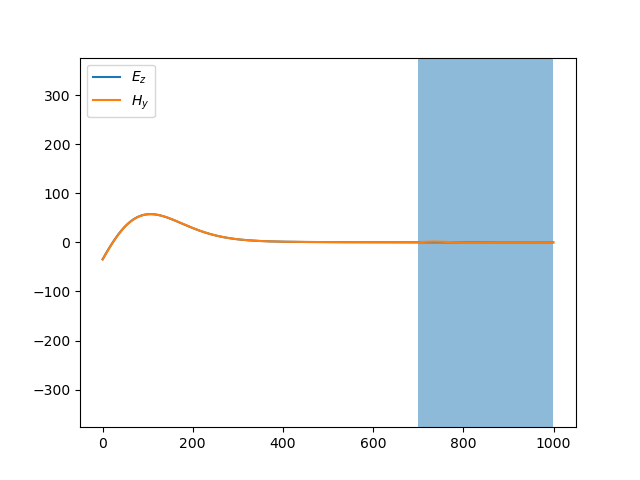

100%|███████████████████████████████████████| 2000/2000 [00:25<00:00, 77.12it/s]


In [2]:
# properties of the simulation
grid_size=1000  # the grid is the space in which the simulation happens
simulation_time=2000  # the number of time units to run the simulation for

# properties of the source field
source_point=10  # where in the grid to inject the source
ppw=500  # points per wavelength at the peak frequency, this is inversley proportional to the frequency of the wave
delay_multiple=1 # controls the spatial delay of the wavelet

# plotting parameters
plot_interval=20  # if this is equal to n, then we plot the fields at every n'th time step

# add a lossless material
epsr=4  # relative permittivity (epsilon_r)
thickness_ratio=.3  # ratio of the total grid that should be filled with the material

sim=fdtd.simulator(grid_size)
sim.add_loss(loss=0.05, thickness_ratio=thickness_ratio, epsr=epsr)
sim.run(simulation_time, source_point, 'ricker', plot_interval, ppw=ppw, delay_multiple=delay_multiple)